In [12]:
t0_utc="2020-04-27T18:32:00"
t1_rel_days=-10
t2_rel_days=15
source_name="SGR 1935+2154"

In [3]:
# 2020 Feb     02.56 and 2020 Feb 04.34

In [4]:
%matplotlib notebook
import matplotlib.pylab as plt

import numpy as np
import pandas as pd

In [5]:
import importlib
import integralclient as ic
importlib.reload(ic)

from astropy.coordinates import SkyCoord

from astroquery.simbad import Simbad
t=Simbad.query_object(source_name)

source_coord = SkyCoord(t[0]['RA'], t[0]['DEC'], unit=("hourangle", "deg"))

selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/
selecting timesystem endpoint https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/


In [15]:
t0_ijd = float(ic.converttime("UTC", t0_utc, "IJD"))

t1_ijd = t0_ijd+t1_rel_days
t2_ijd = t0_ijd+t2_rel_days

t0_ijd

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-27T18:32:00/IJD


7422.773022962963

In [21]:
import astropy.io.fits as fits
from astropy.coordinates import SkyCoord
import matplotlib as mpl

import numpy as np
import healpy as hp

In [16]:
t_ref_isot = "2020-04-28T00:00:00"
t_ref_ijd=float(ic.converttime("UTC", t_ref_isot, "IJD"))

r1,r0,r2=map(int,[ic.converttime("IJD", t1_ijd, "REVNUM"), ic.converttime("IJD", t0_ijd, "REVNUM"), ic.converttime("IJD", t2_ijd, "REVNUM")])
r1,r0,r2

r_t1, r_t2 = map(float, ic.converttime("REVNUM", r1, "IJD", debug=True).split()[1:])

r_t1

import glob

atts=[]
for rev in range(r1-1,r2+1): 
    print(rev)
    
    for attf in glob.glob("/mnt/sshfs/isdc-in01/isdc/arc/rev_3/aux/adp/%4i.000/attitude_*.fits*"%rev) + \
                glob.glob("/mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/%4i.000/attitude_*.fits*"%rev):
        
        print("att?", attf)
        f=fits.open(attf)
        break
    atts.append(f[1].data)
att=np.hstack(atts)
att

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/UTC/2020-04-28T00:00:00/IJD
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7412.7730229629632959/REVNUM
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.7730229629632959/REVNUM
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7437.7730229629632959/REVNUM
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2218/IJD
2217
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2217.000/attitude_predicted_01.fits
2218
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2218.000/attitude_predicted_01.fits
2219
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2219.000/attitude_predicted_01.fits
2220
att? /mnt/sshfs/isdc-in01/isdc/pvphase/nrt/ops/aux/adp/2220.000/attitude_predicted_01.fit

array([(b'22170000', b'P', b' ',  0, 7409.63507157, 7409.63507157, 7409.63507157, 12671.52, nan, 257.1963 , -38.880417, 357.44638 , -12.4447775, b'            ',  0.,  0., 123., 255, nan, nan, nan),
       (b'22170001', b'O', b' ',  0, 7409.78173824, 7409.79971278, 7409.78173824,     0.  , nan, 257.19376, -38.891167, 357.4514  , -12.448916 , b'            ', nan, nan, 123., 255, nan, nan, nan),
       (b'22170001', b'O', b' ',  1, 7409.78173824, 7409.79971278, 7409.78184241,     0.  , nan, 257.1861 , -38.92339 , 357.46625 , -12.461278 , b'            ', nan, nan, 123., 255, nan, nan, nan),
       ...,
       (b'22270058', b'O', b' ', 10, 7438.69927296, 7438.7003725 , 7438.7003725 ,     0.  , nan, 138.     , -30.      ,  56.932377,  15.052555 , b'            ', nan, nan,  96., 255, nan, nan, nan),
       (b'22270058', b'S', b' ',  0, 7438.69927296, 7438.7003725 , 7438.7003725 ,     0.  , nan, 138.     , -30.      ,  56.932457,  15.052694 , b'            ',  0.,  0.,  96., 255, nan, nan,

/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in arccos


<IPython.core.display.Javascript object>


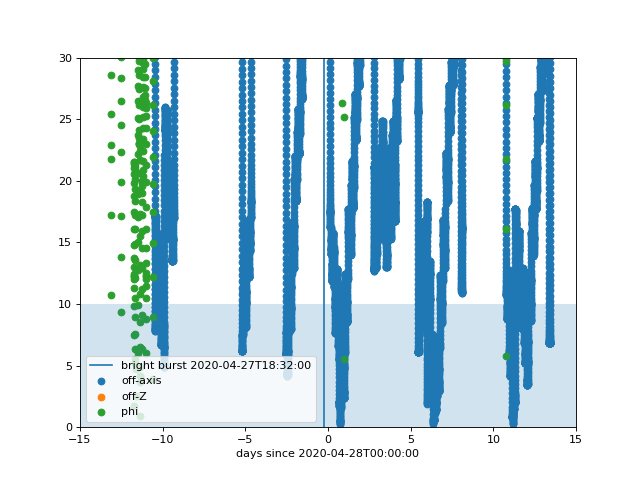

In [22]:
scx=SkyCoord(att['RA_SCX'],att['DEC_SCX'],unit="deg")
scz=SkyCoord(att['RA_SCZ'],att['DEC_SCZ'],unit="deg")

scx.separation(source_coord).deg




source_on_scx = source_coord.cartesian.x.value*scx.cartesian.x.value + \
source_coord.cartesian.y.value*scx.cartesian.y.value + \
source_coord.cartesian.z.value*scx.cartesian.z.value

source_in_zy = np.array([scx.cartesian.x - source_coord.cartesian.x*source_on_scx, \
               scx.cartesian.y - source_coord.cartesian.y*source_on_scx, \
               scx.cartesian.z - source_coord.cartesian.z*source_on_scx])

source_in_zy/=np.sum(source_in_zy**2,0)


source_on_z_in_zy = source_in_zy[0]*scz.cartesian.x.value + \
source_in_zy[1]*scz.cartesian.y.value + \
source_in_zy[2]*scz.cartesian.z.value

source_theta_deg = np.arccos(source_on_scx)/np.pi*180
source_phi_deg = np.arccos(source_on_z_in_zy)/np.pi*180

plt.figure(figsize=(8,6))

plt.scatter(
        (att['TIME']-t_ref_ijd),
        scx.separation(source_coord).deg,
        label="off-axis"
    )

plt.scatter(
        (att['TIME']-t_ref_ijd),
        scz.separation(source_coord).deg,
        label="off-Z"
    )

#plt.plot(
#        att['TIME']-t0_ijd,
#        source_theta_deg,
#        label="theta"
#    )

plt.scatter(
        (att['TIME']-t_ref_ijd),
        source_phi_deg,
        label="phi"
    )


plt.axvline((t0_ijd-t_ref_ijd), label="bright burst "+t0_utc)

plt.xlabel("days since "+t_ref_isot)

plt.axhspan(0, 10, alpha=0.2)

plt.ylim([0,30])
#plt.xlim(t1_rel_days, t2_rel_days)
plt.xlim(-15,15)


plt.legend()

<IPython.core.display.Javascript object>


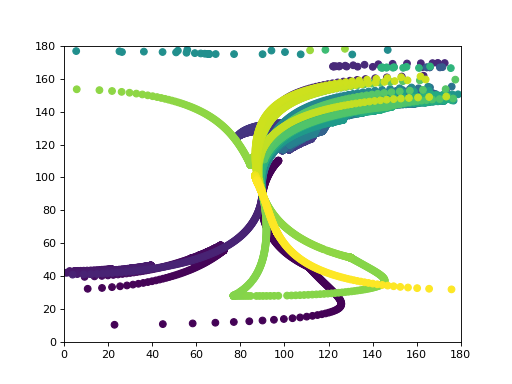

(0.0, 180.0)

In [23]:
f=plt.figure()

plt.scatter(
        source_phi_deg,
        180-source_theta_deg,
        c=att['TIME']-t0_ijd
)

plt.xlim([0,180])
plt.ylim([0,180])


In [24]:
ds = []

revs = []

for lfn in open("ReduceBursts-list.txt"):
    print("?",lfn)
    fn=lfn.strip().split()[-1]
    print(lfn,fn)
    d=pd.read_csv(fn)
    
    revs.append(fn.split("/")[5])
    
    try:
        print(len(d.columns),np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)
    except:
        print("skipping")
    
    ds.append(d)     

        
d=pd.concat(ds).reset_index()
print(np.min(d['Classification.burst_data.time'])-t0_ijd,np.max(d['Classification.burst_data.time'])-t0_ijd)

revs

? /data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz

/data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2200/ReduceBursts.v1/10d5879a/burst_results.txt.gz
440 -58.03948662595849 -55.962145734101796
? /data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz

/data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2221/ReduceBursts.v1/bf99957b/burst_results.txt.gz
440 -2.170417464187267 -0.12525020739667525
? /data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz

/data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz
 /data/reduced/ddcache/byrev/2219/ReduceBursts.v1/b3a64e77/burst_results.txt.gz
440 -7.533056958964153 -5.465105487705841
? /data/reduced/ddcache/byrev/2220/ReduceBursts.v1/ea625a8f/burst_results.txt.gz

/data/reduced/ddcache/byrev/2220/ReduceBursts.v1/ea625a8f/burst_re

['2200',
 '2221',
 '2219',
 '2220',
 '2222',
 '2222',
 '2221',
 '2220',
 '2225',
 '2223',
 '2224',
 '2227',
 '2226']

In [25]:
r_times=[]
r_gaps=[]

end=None

revr=[]

for rev in range(int(revs[0]), int(revs[-1])): 
    print(rev)
    i1, i2 = list(map(float,ic.converttime("REVNUM",rev,"IJD").split()[1:]))
    
    
    t=np.array(d['Classification.burst_data.time'])
    t=t[(t>i1) & (t<i2)]
    
    if len(t)==0:
        print("empty")
        continue
        
    revr.append([i1,i2])    
    
    id1=min(t)
    id2=max(t)
    
    r_times.append([id1,id2])
    if end is not None:
        r_gaps.append((end,id1))
    end=id2

r_times
r_gaps

2200
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2200/IJD
2201
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2201/IJD
empty
2202
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2202/IJD
empty
2203
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2203/IJD
empty
2204
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2204/IJD
empty
2205
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2205/IJD
empty
2206
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2206/IJD
empty
2207
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2207/IJD
empty
2208
url https://www.astro.uni

[(7366.8108772288615, 7415.239966003999),
 (7417.307917475257, 7417.890327115019),
 (7419.946426094746, 7420.602605498776),
 (7422.647772755567, 7423.209192870177),
 (7425.211349984955, 7425.8657487226965),
 (7427.972504521068, 7428.533311742666),
 (7430.624116493105, 7431.2089573021485)]

In [26]:
np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],50)

1.1379274639485513

In [27]:

known_grbs=[dict(zip(["name", "utc", "ra", "dec"], r)) for r in [
    #("GRB 180418", "2018-04-18T06:44:06",228.047, -8.148),            
]]

#tt = float(ic.converttime("UTC","2018-04-13T02:49:43","IJD"))
for grb in known_grbs:
    grb['ijd'] = float(ic.converttime("UTC",grb['utc'],"IJD"))

known_grbs

[]

<IPython.core.display.Javascript object>


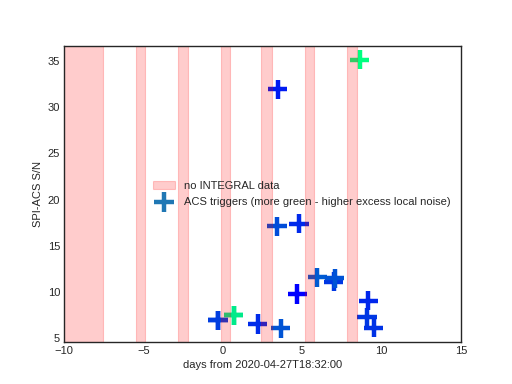

(-10.0, 15.0)

In [28]:
mpl.style.use('seaborn-white')

#plt.figure(figsize=(8,6))
plt.figure()



m=d["BackgroundStability.byscale.2.7.bkg_excvar"]<1.5 #np.nanpercentile(d["BackgroundStability.byscale.2.7.bkg_excvar"],50)

#!!!
#m&=(d["Durations.durations.spikeprob"]<0.1) #| (d["Classification.burst_data.len_clean"]>5./24/3600)
m&=(d["Durations.durations.spikeprob"]<0.1) #| (d["Classification.burst_data.len_clean"]>5./24/3600)
#m&=(d["SpikeLike.spikeresults.spikeprob"]<0.1) | (d["Durations.durations.duration"]>5./24/3600)

m&=d["Classification.burst_data.time"]>t0_ijd-1

m&=d["Classification.burst_data.time"]>t0_ijd-10
m&=d["Classification.burst_data.time"]<t0_ijd+10

m&=d["Classification.burst_data.maxsig"]>6
m&=d['Classification.burst_data.maxsig_r']>=0

if False:
    plt.scatter(
    d['Classification.burst_data.time']- t0_ijd, 
    d['Classification.burst_data.maxsig'],
    alpha=0.05
)

plt.scatter(
    d['Classification.burst_data.time'][m] - t0_ijd, 
    d['Classification.burst_data.maxsig'][m],
    c=d["BackgroundStability.byscale.2.7.bkg_std"][m],
    cmap="winter",
    label="ACS triggers (more green - higher excess local noise)",
    marker='+',
    s=300,
    lw=4,
)

plt.xlabel("days from %s"%t0_utc)

#label="known GRB"
label=None
for grb in known_grbs:
    plt.axvline(grb['ijd']-t0_ijd,label=label,c='b',ls='--')
    plt.text(
                grb['ijd']-t0_ijd,30,
                grb['name'],
                rotation="vertical",
                ha="right",
                c='b',
    )
    label=None
    
#plt.axvspan(-0.76,0,alpha=0.2,label="ZTF20aajnksq search region")

label="no INTEGRAL data"
for r_g1, r_g2 in r_gaps:
    plt.axvspan(r_g1-t0_ijd,r_g2-t0_ijd,color="r",alpha=0.2,label=label)    
    label=None
    
#plt.ylim([0,50])

plt.ylabel("SPI-ACS S/N")

#plt.axvline(t1_r_ijd-t0_ijd, ls="--", c='m')
#plt.axvline(t2_r_ijd-t0_ijd, ls="--", c='m', label=t1_r_label+", "+t2_r_label)

plt.legend()

#plt.text(t1_r_ijd, t1_r_label)

len(d['Classification.burst_data.time'][m])


plt.xlim([-10,15])

#plt.axvline(tt1-t0_ijd)

In [29]:
d['len_s']=d['Classification.burst_data.len']*24*3600


d[m][['len_s','Classification.burst_data.maxsig','Classification.burst_data.time']]


,len_s,Classification.burst_data.maxsig,Classification.burst_data.time
127,-0.150000,6.888897,7422.474173
276,-0.050000,7.419216,7423.455691
286,-0.050000,7.419216,7423.455691
329,-0.049998,6.494865,7424.972765
388,-0.150000,6.888897,7422.474173
477,51.750082,35.193367,7431.404374
498,-0.549998,7.200013,7431.869845
502,-28.849998,9.032150,7431.955533
509,-12.899988,6.107841,7432.278353
534,-15.649965,17.070028,7426.186174


In [30]:
import datetime
import glob

def utc2path(utc):
    utc_date=datetime.datetime.strptime(utc, "%Y-%m-%dT%H:%M:%S.%f")
    
    r = "/byburst/byyear/"
    r += "/%.4i" % utc_date.year
    r += "/%.4i-%.2i" % (utc_date.year,utc_date.month)
    r += "/%.4i-%.2i-%.2i" % (utc_date.year,utc_date.month,utc_date.day)
    r += "/%s" % utc.replace(":","-")
    r += "/" 
    return r

#utc2path(utc)

In [31]:
resolutions=[1]+list(map(int,open("resolutions.txt").readlines()))

def rebin(x,n,o=0,av=True):
    x=np.array(x)
    
    N=int(x.shape[0]/n)
  #  print(N)
    return x[:N*n].reshape((N,n)).mean(1)

def plot(lcb, t0, len_s, basescales, extrascales, span_s):
    plt.figure()
    
    assoc=get_assoc(t0)
    
    if len(assoc)>0:
        plt.title("aka "+", ".join([a['name'] for a in assoc]))
    else:
        print("no associations for", t0)
    
    
    basescales=list(map(int, basescales))
    scales=list(map(int, basescales+extrascales))

    if min(basescales)<3:
        plt.plot(
            (lcb.t-t0)*24*3600, 
            lcb.c,
            alpha=0.1
    )

    bestymin=None
    bestymax=None
    
    for n in scales:
        nN=resolutions[int(n)]
        
        s_c=rebin(lcb.c,nN)
        s_ce=rebin(lcb.ce,nN)/nN**0.5
        
        plt.errorbar(
            (rebin(lcb.t,nN)-t0)*24*3600, 
            s_c,
            s_ce,
            label="%.3lgs"%(nN*0.05)
        )
                
        newmax=np.max(s_c+s_ce*3)
        newmin=np.min(s_c-s_ce*3)
        
        if bestymax is None or newmax>bestymax:
            bestymax=newmax
        
        if bestymin is None or newmin<bestymin:
            bestymin=newmin
    
    plt.axvspan(0,len_s,alpha=0.1)
    plt.axvspan(
            0-resolutions[basescales[0]]*0.05,
            len_s+resolutions[basescales[1]]*0.05,
            alpha=0.1)
    
    plt.legend()
    
    plt.xlim([-span_s,span_s])
    plt.ylim([bestymin,bestymax])
    
    plt.xlabel("second since %s"%ic.converttime("IJD", t0, "UTC"))
    


In [32]:
import os

def get_assoc(t0, limit=100):
    print(ic.converttime("IJD", t0, "UTC"))
    
    associations=[]
    for g in known_grbs:
        dist_s=(t0-g['ijd'])*24*3600
        if abs(dist_s)<limit:
            print(dist_s)
            associations.append(g)
            
    return associations
                
get_assoc(7334.24911,100)

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7334.2491099999997459/UTC
2020-01-30T05:57:33.919


[]

In [33]:
d=d.sort_values('Classification.burst_data.time')


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until



url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2221/IJD
2020-04-27T11:21:39.366 7422.474173041674 0.8500003401422875 6.8888971827917285 2221
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7420.2781502777779679/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
rev 2020-04-25T06:39:23.000 2020-04-27T22:30:46.999
Durations.durations.spikeprob 0.0052897407207698425
SpikeLike.spikeresults.spikeprob 0.145904676271017
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04-27T11:21:39.366+7.4&submit=Submit
t90 0.25000096211442724
lcfn pattern /data/reduced/ddcache//byburst/byyear//2020/2020-04/2020-04-27/2020-04-27T11-21-39.366//LCData.v2*/*/output.txt.gz
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC


<IPython.core.display.Javascript object>


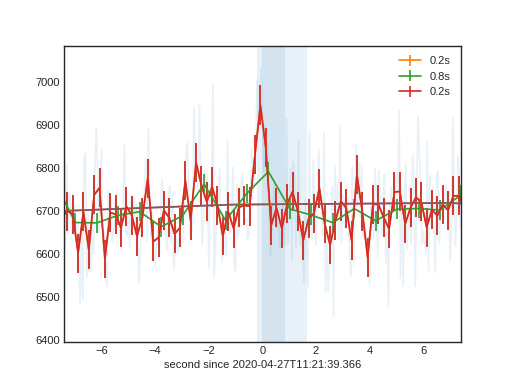

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC
2020-04-27T11:21:39.366
no associations for 7422.474173041674
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2221/IJD
2020-04-27T11:21:39.366 7422.474173041674 0.8500003401422875 6.8888971827917285 2221
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7420.2781502777779679/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
rev 2020-04-25T06:39:23.000 2020-04-27T22:30:46.999
Durations.durations.spikeprob 0.0052897407207698425
SpikeLike.spikeresults.spikeprob 0.145904676271017
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04

<IPython.core.display.Javascript object>


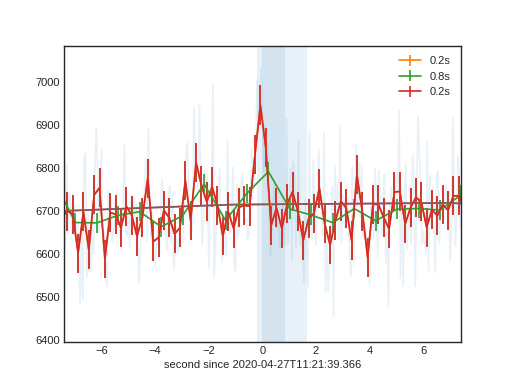

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC
2020-04-27T11:21:39.366
no associations for 7422.474173041674
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.4741730416735663/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-28T10:55:02.548 7423.4556913448705 0.14999957929830993 7.41921597052746 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:58.999
Durations.durations.spikeprob 0.04365704771456059
SpikeLike.spikeresults.spikeprob 0.30594807501406834
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04

<IPython.core.display.Javascript object>


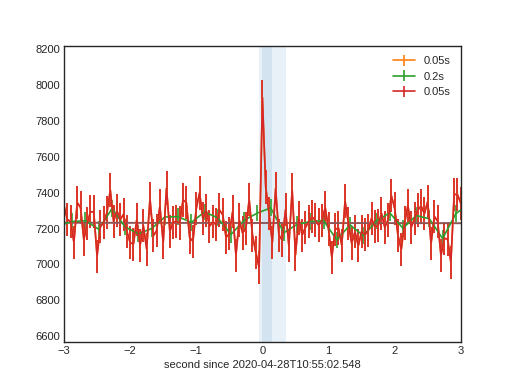

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC
2020-04-28T10:55:02.548
no associations for 7423.4556913448705
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-28T10:55:02.548 7423.4556913448705 0.14999957929830993 7.41921597052746 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:58.999
Durations.durations.spikeprob 0.04365704771456059
SpikeLike.spikeresults.spikeprob 0.30594807501406834
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-0

<IPython.core.display.Javascript object>


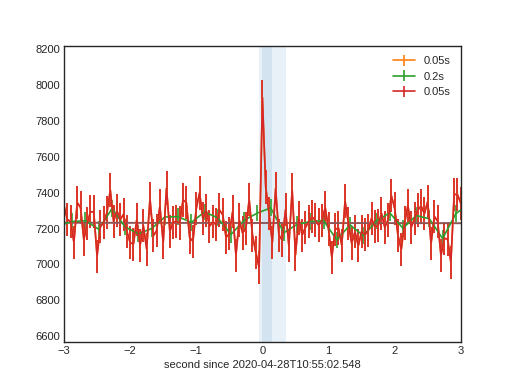

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC
2020-04-28T10:55:02.548
no associations for 7423.4556913448705
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7423.4556913448705018/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2222/IJD
2020-04-29T23:19:37.688 7424.972764725689 3.500001918291673 6.494864585686687 2222
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7422.9388447222218019/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
rev 2020-04-27T22:30:46.999 2020-04-30T14:20:58.999
Durations.durations.spikeprob 0.0632326466075005
SpikeLike.spikeresults.spikeprob 0.21045230372313897
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-04-2

<IPython.core.display.Javascript object>


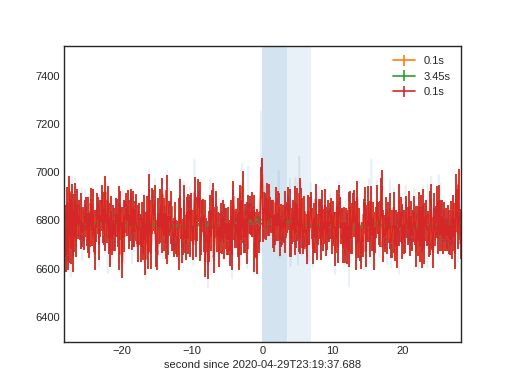

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.9727647256886485/UTC
2020-04-29T23:19:37.688
no associations for 7424.972764725689
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7424.9727647256886485/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
2020-05-01T04:26:56.279 7426.186174342948 42.55003520229364 17.070027768103422 2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
rev 2020-04-30T14:20:58.999 2020-05-03T06:10:18.000
Durations.durations.spikeprob 2.32064667029374e-310
SpikeLike.spikeresults.spikeprob 0.9779721602142434
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


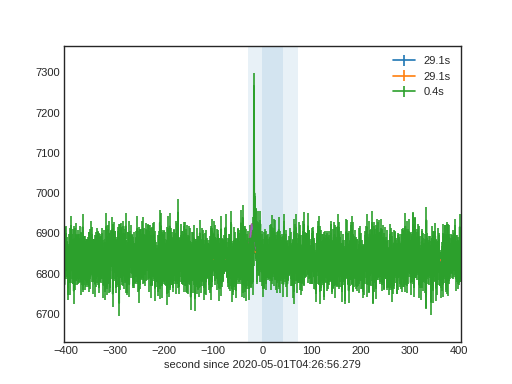

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.1861743429481066/UTC
2020-05-01T04:26:56.279
no associations for 7426.186174342948
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.1861743429481066/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
2020-05-01T05:33:55.082 7426.232688269422 117.75009471166413 31.969259530434922 2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
rev 2020-04-30T14:20:58.999 2020-05-03T06:10:18.000
Durations.durations.spikeprob -1.0
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05-01T05:33:55.082+703.8&submit=S

<IPython.core.display.Javascript object>


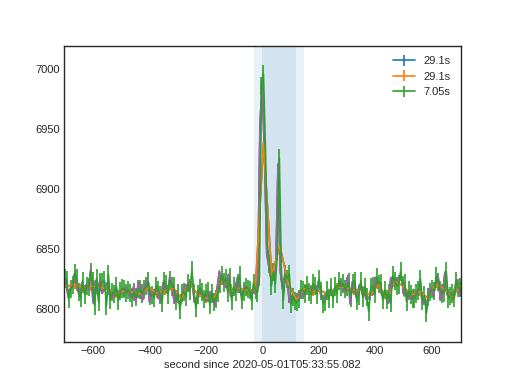

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.2326882694223968/UTC
2020-05-01T05:33:55.082
no associations for 7426.232688269422
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.2326882694223968/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
2020-05-01T10:25:45.396 7426.435353941223 0.4499988950556144 6.018860457273108 2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
rev 2020-04-30T14:20:58.999 2020-05-03T06:10:18.000
Durations.durations.spikeprob 0.0028251479148036717
SpikeLike.spikeresults.spikeprob 0.3962404207157952
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


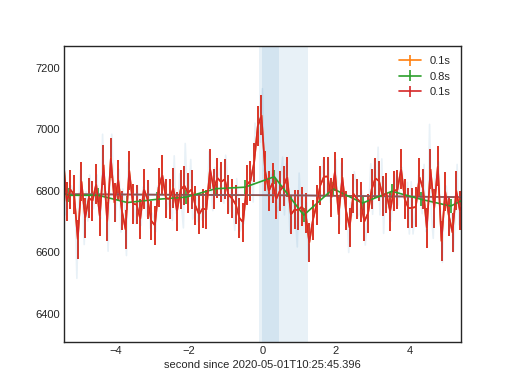

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.4353539412231839/UTC
2020-05-01T10:25:45.396
no associations for 7426.435353941223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7426.4353539412231839/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
2020-05-02T11:09:04.317 7427.465434042886 3.550003611599095 9.741066119788917 2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
rev 2020-04-30T14:20:58.999 2020-05-03T06:10:18.000
Durations.durations.spikeprob 0.054344886718649794
SpikeLike.spikeresults.spikeprob 0.23006723791675665
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05-

<IPython.core.display.Javascript object>


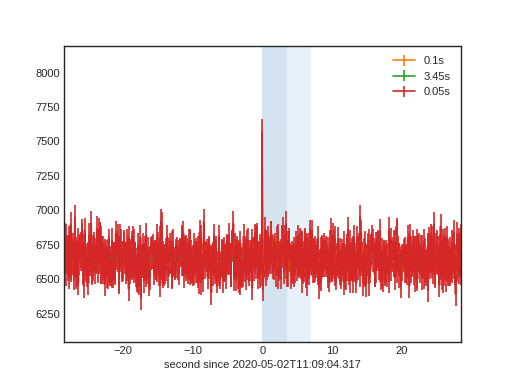

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7427.4654340428860451/UTC
2020-05-02T11:09:04.317
no associations for 7427.465434042886
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7427.4654340428860451/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2223/IJD
2020-05-02T13:46:38.475 7427.574857169506 40.65003560681362 17.363746122912186 2223
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7425.5987058333330424/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
rev 2020-04-30T14:20:58.999 2020-05-03T06:10:18.000
Durations.durations.spikeprob 2.32064667029374e-310
SpikeLike.spikeresults.spikeprob 0.7292363845374219
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


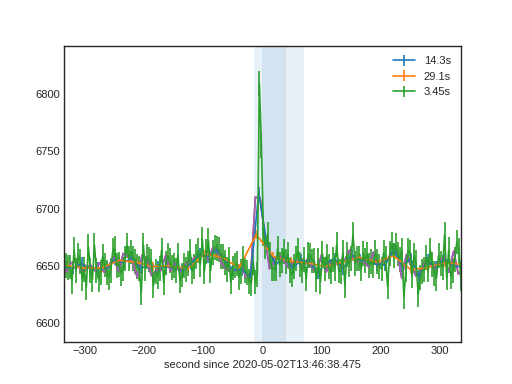

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7427.5748571695057763/UTC
2020-05-02T13:46:38.475
no associations for 7427.574857169506
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7427.5748571695057763/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2224/IJD
2020-05-03T17:18:50.914 7428.722223363584 58.10004829836544 11.538796577138276 2224
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
rev 2020-05-03T06:10:18.000 2020-05-05T21:59:41.999
Durations.durations.spikeprob 0.0
SpikeLike.spikeresults.spikeprob 0.2019540645501298
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05-03T17:18:50.914+4

<IPython.core.display.Javascript object>


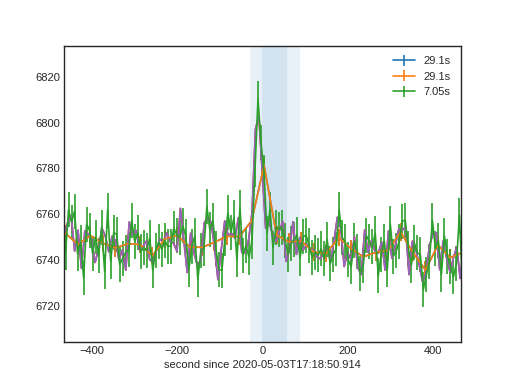

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.7222233635839075/UTC
2020-05-03T17:18:50.914
no associations for 7428.722223363584
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.7222233635839075/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2224/IJD
2020-05-04T18:12:57.528 7429.759799910081 0.24999997986014927 11.087272903517674 2224
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
rev 2020-05-03T06:10:18.000 2020-05-05T21:59:41.999
Durations.durations.spikeprob 0.06388856761991356
SpikeLike.spikeresults.spikeprob 0.11894244541423747
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-0

<IPython.core.display.Javascript object>


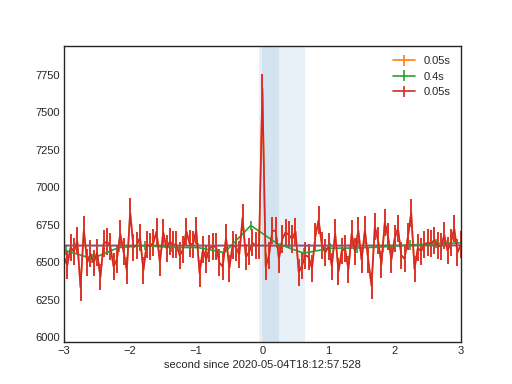

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7429.7597999100808011/UTC
2020-05-04T18:12:57.528
no associations for 7429.759799910081
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7429.7597999100808011/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2224/IJD
2020-05-04T19:54:18.282 7429.830179005878 0.8499984542140734 11.448168803244501 2224
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7428.2579535185186614/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
rev 2020-05-03T06:10:18.000 2020-05-05T21:59:41.999
Durations.durations.spikeprob 0.040615792426058735
SpikeLike.spikeresults.spikeprob 0.4018954617013758
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


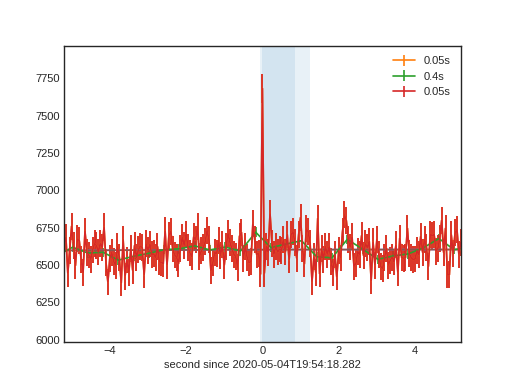

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7429.8301790058776533/UTC
2020-05-04T19:54:18.282
no associations for 7429.830179005878
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7429.8301790058776533/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2225/IJD
2020-05-06T09:41:08.741 7431.4043741327405 109.9500817770604 35.193367161296976 2225
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7433.5766687962959622/UTC
rev 2020-05-05T21:59:41.999 2020-05-08T13:49:14.999
Durations.durations.spikeprob 2.33206390762583e-310
SpikeLike.spikeresults.spikeprob nan
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05-06T09:41:08.7

<IPython.core.display.Javascript object>


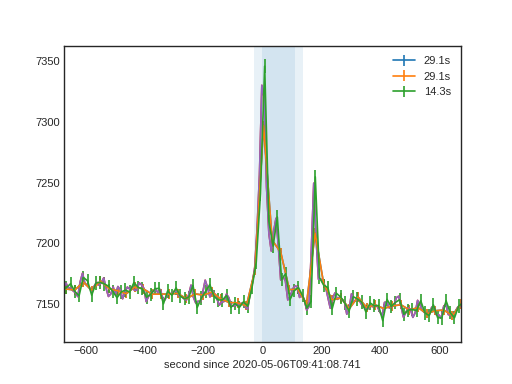

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.4043741327404859/UTC
2020-05-06T09:41:08.741
no associations for 7431.4043741327405
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.4043741327404859/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2225/IJD
2020-05-06T20:51:25.417 7431.869844926018 0.25000186578836286 7.200013170823027 2225
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7433.5766687962959622/UTC
rev 2020-05-05T21:59:41.999 2020-05-08T13:49:14.999
Durations.durations.spikeprob 0.05554372817541032
SpikeLike.spikeresults.spikeprob 0.08035096495985243
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-0

<IPython.core.display.Javascript object>


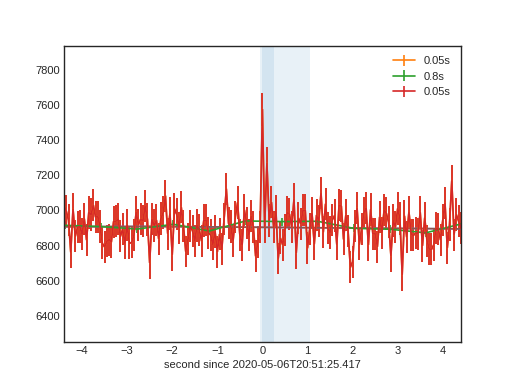

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.8698449260182315/UTC
2020-05-06T20:51:25.417
no associations for 7431.869844926018
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.8698449260182315/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2225/IJD
2020-05-06T22:54:48.871 7431.95553305472 0.25000194436870515 9.032150160092161 2225
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7433.5766687962959622/UTC
rev 2020-05-05T21:59:41.999 2020-05-08T13:49:14.999
Durations.durations.spikeprob 0.002821371444843777
SpikeLike.spikeresults.spikeprob 0.27748108340651473
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


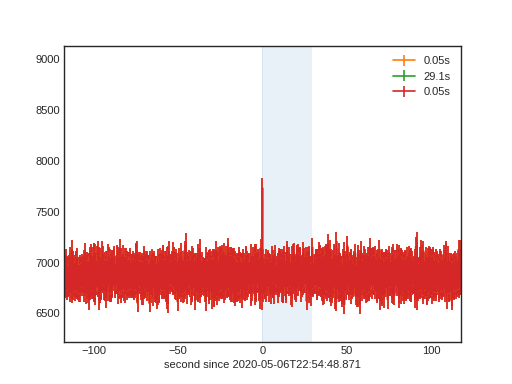

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.9555330547200356/UTC
2020-05-06T22:54:48.871
no associations for 7431.95553305472
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7431.9555330547200356/UTC

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/REVNUM/2225/IJD
2020-05-07T06:39:40.537 7432.278353259224 16.60001164418645 6.1078413923150165 2225
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7430.9172590740736268/UTC
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7433.5766687962959622/UTC
rev 2020-05-05T21:59:41.999 2020-05-08T13:49:14.999
Durations.durations.spikeprob 2.33206390762583e-310
SpikeLike.spikeresults.spikeprob 0.21025524505080204
https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=2020-05

<IPython.core.display.Javascript object>


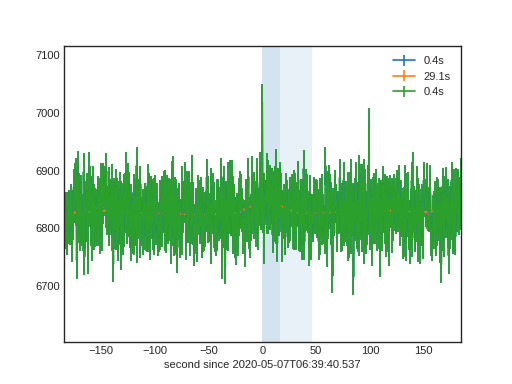

url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7432.2783532592238771/UTC
2020-05-07T06:39:40.537
no associations for 7432.278353259224
url https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem//api/v1.0/converttime/IJD/7432.2783532592238771/UTC


In [34]:
summary=[]

for i,(I,r) in enumerate(d[m].iterrows()):
    
    r['len_s'] = r['Classification.burst_data.len_clean']*24*3600
    
    print("\n", "="*30)
    #if i!=32: continue

    grb={}
    summary.append(grb)
    
    t=r['Classification.burst_data.time']
    times=ic.converttime("ANY","%.20lg"%t,"ANY",debug=False)
    utc=times['UTC']
    
    grb['utc'] = utc
    
    len_clean = r['len_s']+\
            (resolutions[int(r['Classification.burst_data.start_r'])]+\
             resolutions[int(r['Classification.burst_data.stop_r'])])*0.05
    
    rev_start,rev_stop=map(float,ic.converttime("REVNUM",times['REVNUM'],"IJD").split()[1:])
    
    print(utc, t, r['len_s'], r['Classification.burst_data.maxsig'], times['REVNUM'])
    print("rev", 
          ic.converttime("IJD", rev_start, "UTC"),
          ic.converttime("IJD", rev_stop, "UTC"),
         )
    
    for cc in "Durations.durations.spikeprob","SpikeLike.spikeresults.spikeprob":
        print(cc, r[cc])
    
 
    grb['duration']="%.3lg"%r['Durations.durations.t90']
    grb['maxsig_scale_s']=resolutions[int(r['Classification.burst_data.maxsig_r'])]
    grb['maxsig']="%.3lg"%r['Classification.burst_data.maxsig']
    
    span_s = max(3,len_clean*4)
    
    print("https://www.isdc.unige.ch/~savchenk/spiacs-online/spiacs-plot.pl?requeststring=%s+%.5lg&submit=Submit"%(utc,span_s))
    
    print("t90",r['Durations.durations.t90'])
    
    lcfnp="/data/reduced/ddcache/"+utc2path(utc)+"/LCData.v2*/*/output.txt.gz"
    print("lcfn pattern",lcfnp)
    lcfn = glob.glob(lcfnp)[0]
    lc=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    
    lcfn = glob.glob("/data/reduced/ddcache/"+utc2path(utc)+"/LCDataB*/*/output.txt.gz")[0]
    lcb=pd.read_csv(lcfn,delim_whitespace=True,names=["t","dt","c","ce","x","y"])
    
    assoc=get_assoc(t)
    
    if len(assoc)==0:
        grb['grb_type']="Possible GRB"
        grb['comment'] ="no known associations"
    else:
        grb['grb_type']="Confirmed GRB"
        grb['comment'] =", ".join([a['name'] for a in assoc])
        
        
    grb['comment']+="\\n\\nINTEGRAL Untargeted All-Sky Detection Pipeline revision {}.\\n\\n https://doi.org/10.1051/0004-6361/201218877".format(r['Classification.burst_data.svnrev'])
    
    
    plot(lcb,
         t0=t,
         len_s=r['len_s'],
         basescales=[
                 r['Classification.burst_data.start_r'],
                 r['Classification.burst_data.stop_r'], 
                 r['Classification.burst_data.maxsig_r']],
         extrascales=[],
         span_s=span_s)
    
    fn="%.20lg.png"%t
    f_fn="/tmp/tmparc/"+fn
    plt.savefig(f_fn)
    #grb['lc_png_uri']="http://me-unige.odahub.io:8000/"+fn
    

    mlcfn=lcfn.replace("output.txt.gz","lc_combined.csv.gz")
    if not os.path.exists(mlcfn):
        print("lc missing:", mlcfn)
    else:
        mlc=pd.read_csv(mlcfn)
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )
        
        plt.plot(
            (mlc.ijd-t)*24*3600,
            mlc.acs/20.,
        )

In [103]:
!mkdir -pv /tmp/tmparc

mkdir: created directory '/tmp/tmparc'


In [35]:
sdf = pd.DataFrame(summary)

sdf['triggerid']=sdf.utc.map(lambda x:(x.replace(":","-")+"-00000-00000-0"))

sdf.to_csv("summary.txt", index=False)

!pwd
!cat summary.txt

/mnt/nvme0n1p5/home/savchenk/work/SGR_1935_2154
utc,duration,maxsig_scale_s,maxsig,grb_type,comment,triggerid
2020-04-27T11:21:39.366,0.25,4,6.89,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-04-27T11-21-39.366-00000-00000-0
2020-04-27T11:21:39.366,0.25,4,6.89,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-04-27T11-21-39.366-00000-00000-0
2020-04-28T10:55:02.548,0.05,1,7.42,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-04-28T10-55-02.548-00000-00000-0
2020-04-28T10:55:02.548,0.05,1,7.42,Possible GRB,no known associations\n\nINTEGRAL Untargeted All-Sky Detection Pipeline revision e4c70b2.\n\n https://doi.org/10.1051/0004-6361/201218877,2020-04-28T10-55-02.548-0000

In [36]:
for i,(I,r) in enumerate(d[m].iterrows()):
    t=r['Classification.burst_data.time']
    times=ic.converttime("ANY","%.20lg"%t,"ANY",debug=False)
    utc=times['UTC']
    
    print(utc[2:4]+utc[5:7]+utc[8:10])


/home/savchenk/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


200427
200427
200428
200428
200429
200501
200501
200501
200502
200502
200503
200504
200504
200506
200506
200506
200507


In [ ]:
# 2018-05-04T03-15-48.6 GRB180504A 
# 2018-04-17T16-32-45.0 fermi sgrb, spikeclas